In [239]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

# Regresion and sum of squares optimisation
This exercise will underline how to use the sum of squares to find the optimal parameters to fit a set of datapoints, and then compare to the expected values that can be computed for a linear curve.

Load "data.csv" and extract the data

In [240]:
data = np.loadtxt("data.csv", delimiter=",", skiprows=1, usecols=[1])
print(data[:10])

[ 1.13033728  3.90882023  6.8734114   4.45968986  7.04756788  6.10803864
  9.30842257  3.60664078  6.92733736 10.59627219]


Plot the data and try to find what type of function would best fit the points. Create such a fit by guessing the parameters and plot it on top of your data points.

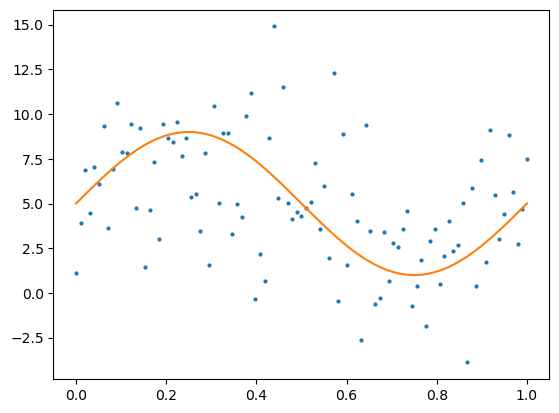

In [241]:
N = data.shape[0]
x = np.linspace(0,1,N)

trial_a = 5
trial_b = 4

fit = trial_a + trial_b * np.sin(2 * np.pi * x)

plt.plot(x, data, marker="o", markersize=2, linewidth=0)
plt.plot(x, fit)
plt.show()

Plot the residual and the squared residual for these given parameters. Find the sum for both of these quantities.

Sum of residual :  -2.2179302281429774
Sum of residual squared :  1063.337085641709


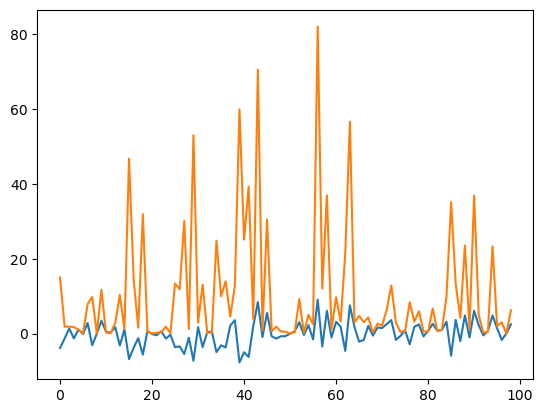

In [242]:
residual = data - fit
square_residual = residual**2
print( "Sum of residual : ", residual.sum() )
print( "Sum of residual squared : ", square_residual.sum() )

plt.plot(residual)
plt.plot(square_residual)
plt.show()

Now, by keeping b constant and iterating on possible values of a, plot the sum of squared residuals with respect to a. What is the minimum value ?
Repeat this for b by keeping a constant.

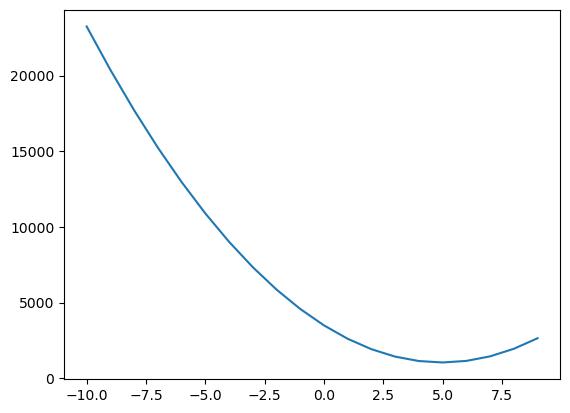

Value of 'a' that minimizes the squared sum (for b=1) :  5


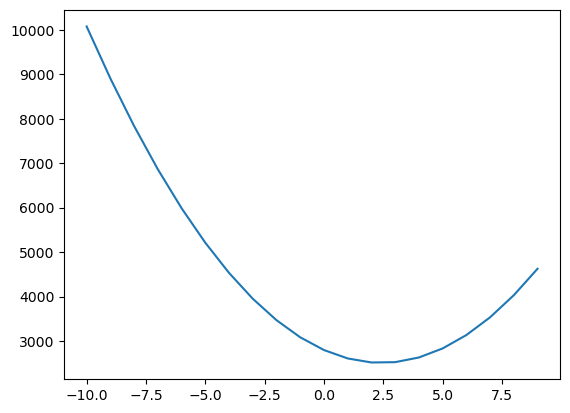

Value of 'b' that minimizes the squared sum (for a=1) :  2


In [243]:
# Constant b, varying a

residual_squared_sums = []

a_trial = np.arange(-10,10)
b = 1

for a in a_trial:
    trial_fit = a + b * np.sin(2*np.pi*x)
    residual_squared_sums.append( ((data - trial_fit)**2).sum() )

plt.plot(a_trial, residual_squared_sums)
plt.show()
print("Value of 'a' that minimizes the squared sum (for b=1) : ", a_trial[np.argmin(residual_squared_sums)]  )

# Constant a, varying b

residual_squared_sums = []

a = 1
b_trial = np.arange(-10,10)

for b in b_trial:
    trial_fit = a + b * np.sin(2*np.pi*x)
    residual_squared_sums.append( ((data - trial_fit)**2).sum() )

plt.plot(b_trial, residual_squared_sums)
plt.show()
print("Value of 'b' that minimizes the squared sum (for a=1) : ", b_trial[np.argmin(residual_squared_sums)]  )



(Optionnal) An interesting way of visualizing the optimal points and making sure the points are not local minimas is to do a 2D plot of the sum of residuals squared with respect to a and b. This can be done using the `plt.contour(a, b, RSS)` to plot the lines of equal sum, or `plt.contourf(a, b, RSS)` to represent the sum values as a gradient.

Find the optimal values of a and b using this technique.

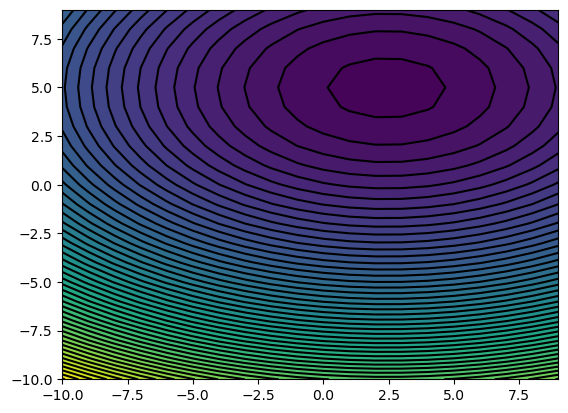

In [244]:
residual_squared_sums = []

a_trial = np.arange(-10,10)
b_trial = np.arange(-10,10)

for a in a_trial:
    for b in b_trial:
        trial = a + b * np.sin(2*np.pi*x)
        residual_squared_sums.append( ((data - trial)**2).sum() )

residual_squared_sums = np.array(residual_squared_sums).reshape((a_trial.shape[0],b_trial.shape[0]))

plt.contourf(a_trial, b_trial, residual_squared_sums, 50)
plt.contour(a_trial, b_trial, residual_squared_sums, 50, colors="black")
plt.show()


Using the formulas for the expected values of a and b seen in the lectures, compare your results obtained by iteration.

In [245]:
z = np.sin(2*np.pi*x)
b = ( (z-z.mean())*(data-data.mean()) ).sum() / ( (z-z.mean())**2 ).sum()
a = data.mean() - b*z.mean()
fit = a + b * z
print(a, b)


4.977596664362192 2.426570104313553


Compute the Fisher statistic for this fit. Can you say with a confidence level of $\alpha=0.05$ that this curve fits the points correctly ?

In [246]:
# Fisher Stat
SSM = ((fit - data.mean())**2).sum()
SSE = ((fit - data)**2).sum()

dfM = 1
dfE = len( data ) - 2

MSM = SSM / dfM
MSE = SSE / dfE

F = MSM / MSE

print(F)
print("Critical F-value : ", 3.94, "     (for alpha=0.05, dfM=1, dfE=98)") 

29.71065870045762
Critical F-value :  3.94      (for alpha=0.05, dfM=1, dfE=98)
